In [16]:
! pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c rossmann-store-sales

100% 6.99M/6.99M [00:00<00:00, 13.2MB/s]
100% 6.99M/6.99M [00:00<00:00, 9.35MB/s]


In [ ]:
! unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
  inflating: sample_submission.csv   
  inflating: store.csv               
  inflating: test.csv                
  inflating: train.csv               


# Import python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import  model_selection, feature_selection, svm, metrics, pipeline, preprocessing, metrics
from tqdm import tqdm

import pickle
# tensorflow version
tf.__version__


'2.15.1'

# Read the dataset

In [ ]:
# read the training, testing and store infromation dataset
full_training_dataset = pd.read_csv('train.csv')
full_store_dataset = pd.read_csv('store.csv')
full_testing_dataset   = pd.read_csv('test.csv')



<ipython-input-10-27d0cf9ed79a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_training_dataset = pd.read_csv('train.csv')


In [ ]:
# show the store information dataset
full_store_dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# show the training dataset
full_training_dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# show the testing dataset

full_testing_dataset

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


## Marge the files with store dataset infromation

In [ ]:
# Merging the training dataset with store information on the 'Store' column
# This combines each store's data in the training dataset with its corresponding store details from the store dataset will be use as training dataset
dataset = pd.merge(full_training_dataset, full_store_dataset, on='Store')

# Merging the testing dataset with store information on the 'Store' column
# This ensures that the testing dataset has the same additional store details as the training dataset
testing_dataset = pd.merge(full_testing_dataset, full_store_dataset, on='Store')


In [ ]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Get Iformation about the dataset

### Columns infroamtion

In [ ]:
# Displaying a summary of the merged dataset.
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:

# cheack the messing values
pd.isnull(dataset).sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [ ]:
# cheack the messing values
pd.isnull(testing_dataset).sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


In [ ]:
# Filtering the testing dataset to display rows where the 'Open' column has missing (null) values
testing_dataset[testing_dataset['Open'].isnull()]


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
479,480,622,4,2015-09-17,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1335,1336,622,3,2015-09-16,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
2191,2192,622,2,2015-09-15,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
3047,3048,622,1,2015-09-14,NaN,1,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
4759,4760,622,6,2015-09-12,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
5615,5616,622,5,2015-09-11,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
6471,6472,622,4,2015-09-10,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
7327,7328,622,3,2015-09-09,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
8183,8184,622,2,2015-09-08,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
9039,9040,622,1,2015-09-07,NaN,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


## Preprocessor the Dataset

### Conver the Text to numbers

Certainly! Here's how you might present this as a structured note cell in a Colab notebook to clearly communicate the purpose and steps of the `DatasetPreprocessor` class:

---

### Note: Preprocessing Pipeline Overview for the Rossmann Sales Prediction Dataset

The `DatasetPreprocessor` class is designed to prepare the Rossmann dataset for deep learning by handling data cleaning, feature engineering, and encoding. This pipeline ensures the dataset is ready for modeling with consistent formatting and transformed features. Below is an outline of each step in this preprocessing workflow, along with the rationale behind each transformation:

1. **Cleaning the Dataset**
   - The `clean_dataset` method fills missing values (NaNs) with 0. Through initial data exploration, it was observed that missing values generally represent logical absences, such as no nearby competitors or non-participation in specific promotions. By replacing these values with 0, we ensure they are interpretable by the model.
   - Numeric strings are also standardized by converting them to integers, which maintains a consistent numeric format required for model input.

2. **Extracting Date Components**
   - Using the `create_year_month_day_column` method, the `Date` column is split into separate `Year`, `Month`, and `Day` columns. This decomposition allows the model to capture temporal patterns more effectively, such as daily, monthly, and seasonal trends, without complex date parsing.

3. **Generating Unique Integer IDs for Categorical Features**
   - The `genrate_unique_id_str` method maps categorical features (`StateHoliday`, `StoreType`, `Assortment`, and `PromoInterval`) to unique integer IDs. Deep learning models typically require numeric inputs, so this mapping converts categorical strings into integer labels for easier processing.
   - These mappings are saved for later use, making it straightforward to revert to original values if needed during predictions.

4. **Encoding Categorical Columns**
   - With the `convert_str_to_id` method, the mappings are applied to replace categorical values in the dataset with their corresponding integer IDs. Unlike one-hot encoding, integer encoding is more efficient in this deep learning context, helping to reduce dimensionality while preserving categorical information.

5. **Executing the Preprocessing Pipeline**
   - The `__call__` method coordinates the entire preprocessing pipeline, ensuring a smooth, consistent transformation from raw data to a model-ready format. This structured approach simplifies both training and inference, ensuring reproducibility and consistency across different phases.


In [ ]:

class DatasetPreprocessor:
    """
    A class to preprocess datasets by handling data cleaning, feature engineering, and encoding of categorical variables.

    Attributes
    ----------
    dataset : pd.DataFrame
        The dataset to be preprocessed.
    id_to_str : dict
        A dictionary to map integer IDs back to their original string representations for categorical columns.
    str_to_id : dict
        A dictionary to map unique strings in categorical columns to integer IDs.

    Methods
    -------
    convert_str_to_number(str):
        Converts a string to an integer if it represents a number; otherwise, returns the original string.

    create_year_month_day_column(dataset):
        Extracts 'Year', 'Month', and 'Day' columns from a 'Date' column in the dataset.

    clean_dataset():
        Fills NaN values with 0 and converts numeric strings to integers in the dataset.

    genrate_unique_id_str(dataset, column_name):
        Generates unique integer IDs for specified categorical columns and creates mappings.

    convert_str_to_id(dataset, column_name):
        Replaces categorical values with their corresponding IDs in specified columns.

    convert_id_to_str(dataset, column_name):
        Converts integer IDs back to original string representations in specified columns.

    __call__():
        Runs the entire preprocessing pipeline in sequence.
    """

    def __init__(self, dataset):
        """
        Initializes the preprocessor with the provided dataset.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset to be preprocessed.
        """
        self.dataset = dataset  # Store the provided dataset as an attribute

         # Generate unique ID mappings for specified categorical columns
        self.genrate_unique_id_str(dataset, ['StateHoliday', 'StoreType', 'Assortment', "PromoInterval"])

    def convert_str_to_number(self, str):
        """
        Converts a string to an integer if it represents a number, otherwise returns the original string.

        Parameters
        ----------
        str : str
            The input string to be checked and possibly converted to an integer.

        Returns
        -------
        int or str
            The converted integer if the string was a number, otherwise the original string.
        """
        try:
            # Attempt to convert the string to an integer
            return int(str)
        except ValueError:
            # Return the original string if it cannot be converted to an integer
            return str

    def create_year_month_day_column(self, dataset):
        """
        Adds 'Year', 'Month', and 'Day' columns to the dataset based on the 'Date' column.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset to add new date-based columns to.

        Returns
        -------
        pd.DataFrame
            The dataset with additional 'Year', 'Month', and 'Day' columns.
        """
        # Convert 'Date' column to datetime format to extract date components
        dataset['Date'] = pd.to_datetime(dataset['Date'])

        # Extract year from 'Date' and store it in 'Year' column
        dataset['Year'] = dataset['Date'].dt.year.astype(int)

        # Extract month from 'Date' and store it in 'Month' column
        dataset['Month'] = dataset['Date'].dt.month.astype(int)

        # Extract day from 'Date' and store it in 'Day' column
        dataset['Day'] = dataset['Date'].dt.day.astype(int)

        return dataset  # Return the modified dataset

    def clean_dataset(self,dataset):
        """
        Cleans the dataset by filling NaN values with 0 and converting numeric strings to integers.

        Returns
        -------
        pd.DataFrame
            The cleaned dataset with NaN values replaced and numeric strings converted to integers.
        """
        # Replace NaN values in the dataset with 0
        dataset = dataset.fillna(0)

        # Apply convert_str_to_number to each element in the dataset to standardize data types
        dataset = dataset.applymap(self.convert_str_to_number)

        return dataset  # Return the cleaned dataset

    def generate_unique_id_str(self, dataset, column_name: list):
        """
        Generates unique integer IDs for specified categorical columns and creates mappings for encoding and decoding.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset containing the categorical columns to be encoded.
        column_name : list
            List of column names to generate unique IDs for.
        """
        # Initialize dictionaries for mappings
        self.id_to_str = {}  # Maps integer IDs to strings
        self.str_to_id = {}  # Maps strings to integer IDs

        for col in column_name:
            # Initialize mappings for each column
            id_to_str = {}
            str_to_id = {}

            # Enumerate unique values in the column
            for id, word in enumerate(dataset[col].unique()):
                # Skip if value is 0 (e.g., filled or missing values)
                if word == 0:
                    continue

                # Map integer ID to string and vice versa
                id_to_str[id + 1] = word
                str_to_id[word] = id + 1

            # Store mappings for the column
            self.id_to_str[col] = id_to_str
            self.str_to_id[col] = str_to_id

    def convert_str_to_id(self, dataset, column_name: list):
        """
        Replaces categorical string values with their corresponding IDs in specified columns.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset containing the columns to be transformed.
        column_name : list
            List of column names where string values should be replaced by IDs.

        Returns
        -------
        pd.DataFrame
            The dataset with specified columns transformed to integer IDs.
        """
        for col in column_name:
            # Replace string values with integer IDs based on the stored mappings
            dataset[col].replace(self.str_to_id[col], inplace=True)

        return dataset  # Return the dataset with encoded columns

    def convert_id_to_str(self, dataset, column_name: list):
        """
        Converts integer IDs back to their original string representations in specified columns.

        Parameters
        ----------
        dataset : pd.DataFrame
            The dataset containing the columns to be transformed.
        column_name : list
            List of column names where integer IDs should be replaced by the original strings.

        Returns
        -------
        pd.DataFrame
            The dataset with specified columns transformed back to original string values.
        """
        for col in column_name:
            # Replace integer IDs with original string values based on the stored mappings
            dataset[col].replace(self.id_to_str[col], inplace=True)

        return dataset  # Return the dataset with decoded columns

    def __call__(self,dataset):
        """
        Executes the entire preprocessing pipeline in sequence:
        - Cleans the dataset
        - Adds year, month, and day columns
        - Generates unique IDs for specified categorical columns
        - Encodes categorical columns with integer IDs

        Returns
        -------
        pd.DataFrame
            The fully preprocessed dataset ready for modeling.
        """
        # Clean the dataset by handling NaN values and standardizing numeric strings
        dataset = self.clean_dataset(dataset)

        # Add 'Year', 'Month', and 'Day' columns extracted from 'Date'
        dataset = self.create_year_month_day_column(dataset)

        # Encode categorical columns by replacing strings with integer IDs
        dataset = self.convert_str_to_id(dataset, ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

        return dataset  # Return the fully preprocessed dataset


In [ ]:
# Instantiate the DatasetPreprocessor class with the dataset to be preprocessed
dataset_preprocessor = DatasetPreprocessor(dataset)



# Call the preprocessor instance to execute the entire preprocessing pipeline on the dataset
# This includes cleaning, feature engineering, and encoding categorical columns
cleaned_dataset = dataset_preprocessor(dataset)

# Display the resulting cleaned and preprocessed dataset
cleaned_dataset


<ipython-input-20-5af476da8718>:114: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset = dataset.applymap(self.convert_str_to_number)
<ipython-input-20-5af476da8718>:170: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].replace(self.str_to_id[col], inplace=True)
<ipython-input-20-5af476da8718>:170: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,1,...,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2,...,570,11,2007,1,13,2010,2,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2,...,14130,12,2006,1,14,2011,2,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,1,...,620,9,2009,0,0,0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2,...,29910,4,2015,0,0,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,2,1,2,...,1900,6,2014,1,31,2013,2,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,2,1,1,...,1880,4,2006,0,0,0,0,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,2,1,2,...,9260,0,0,0,0,0,0,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,2,1,2,...,870,0,0,0,0,0,0,2013,1,1


In [ ]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

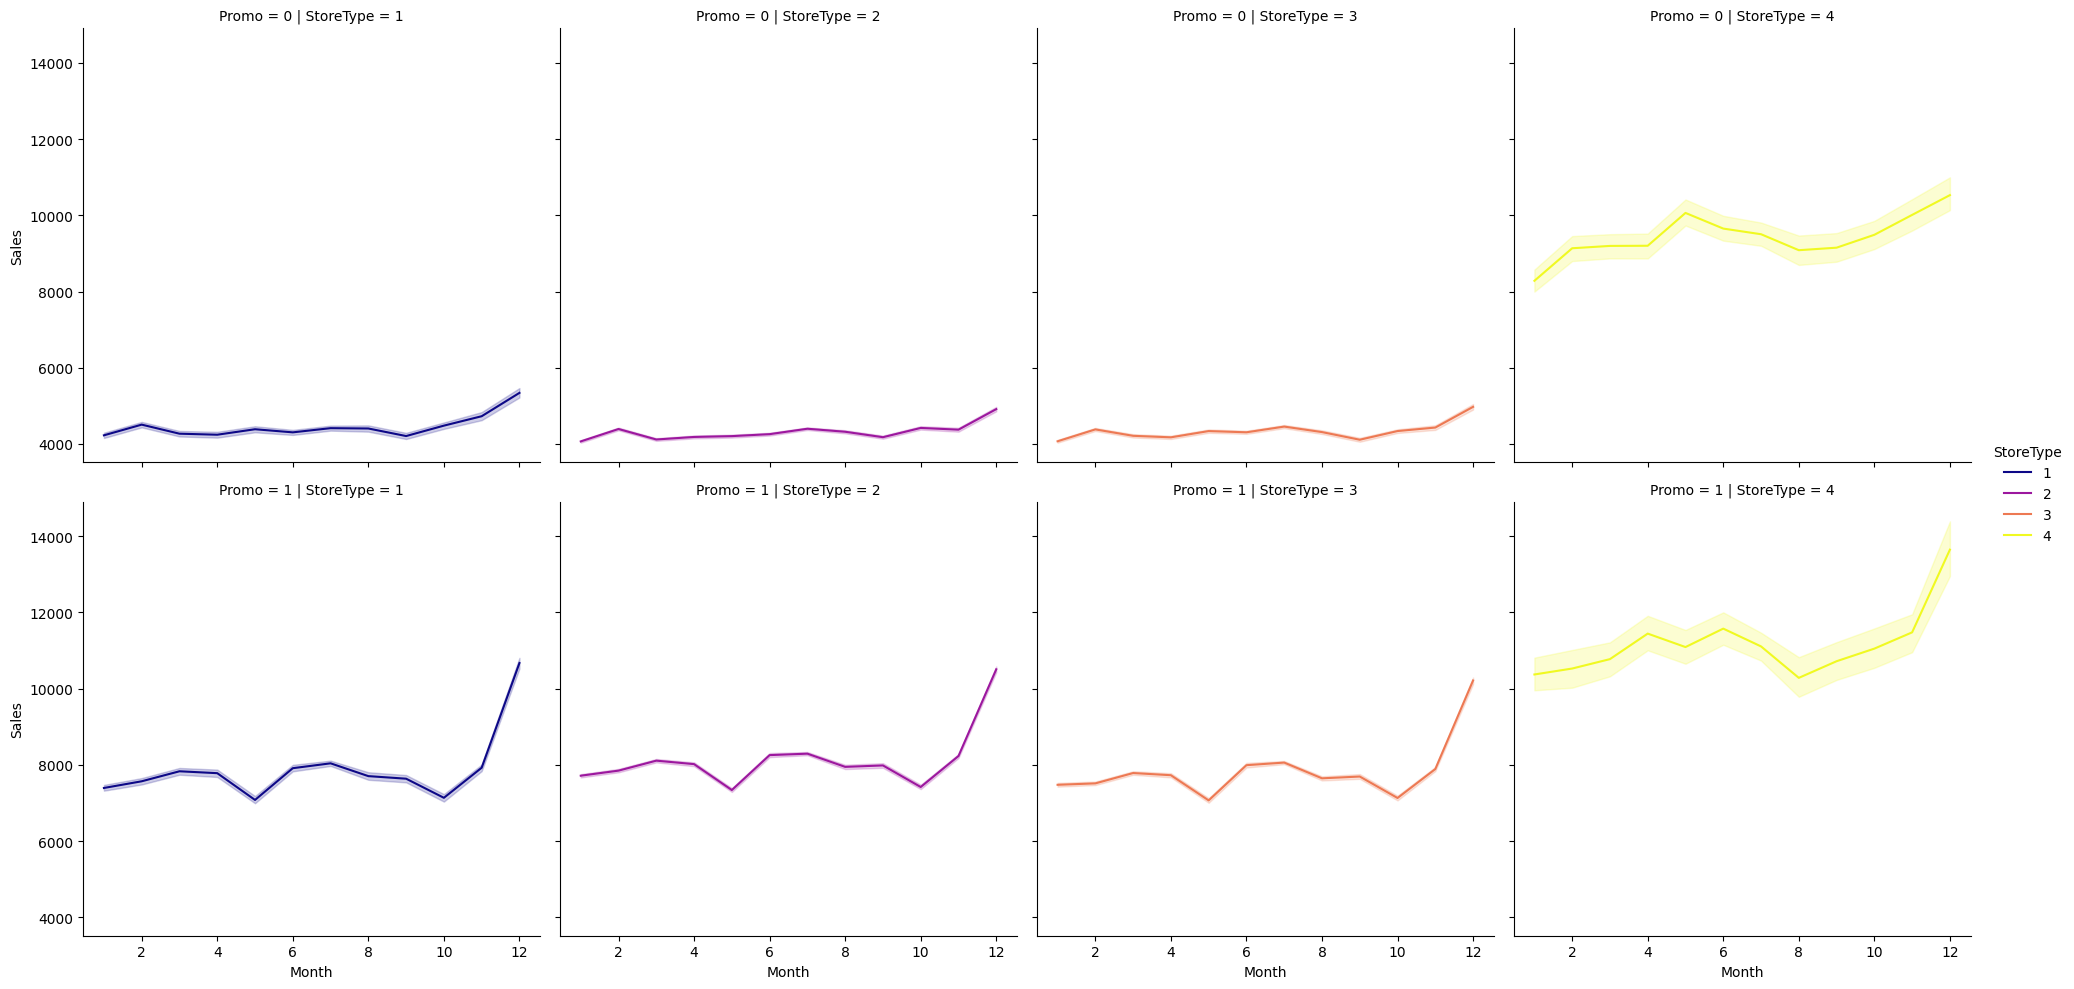

In [ ]:
# sales trends
sns.relplot(data = cleaned_dataset, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows,
            kind="line"
               )

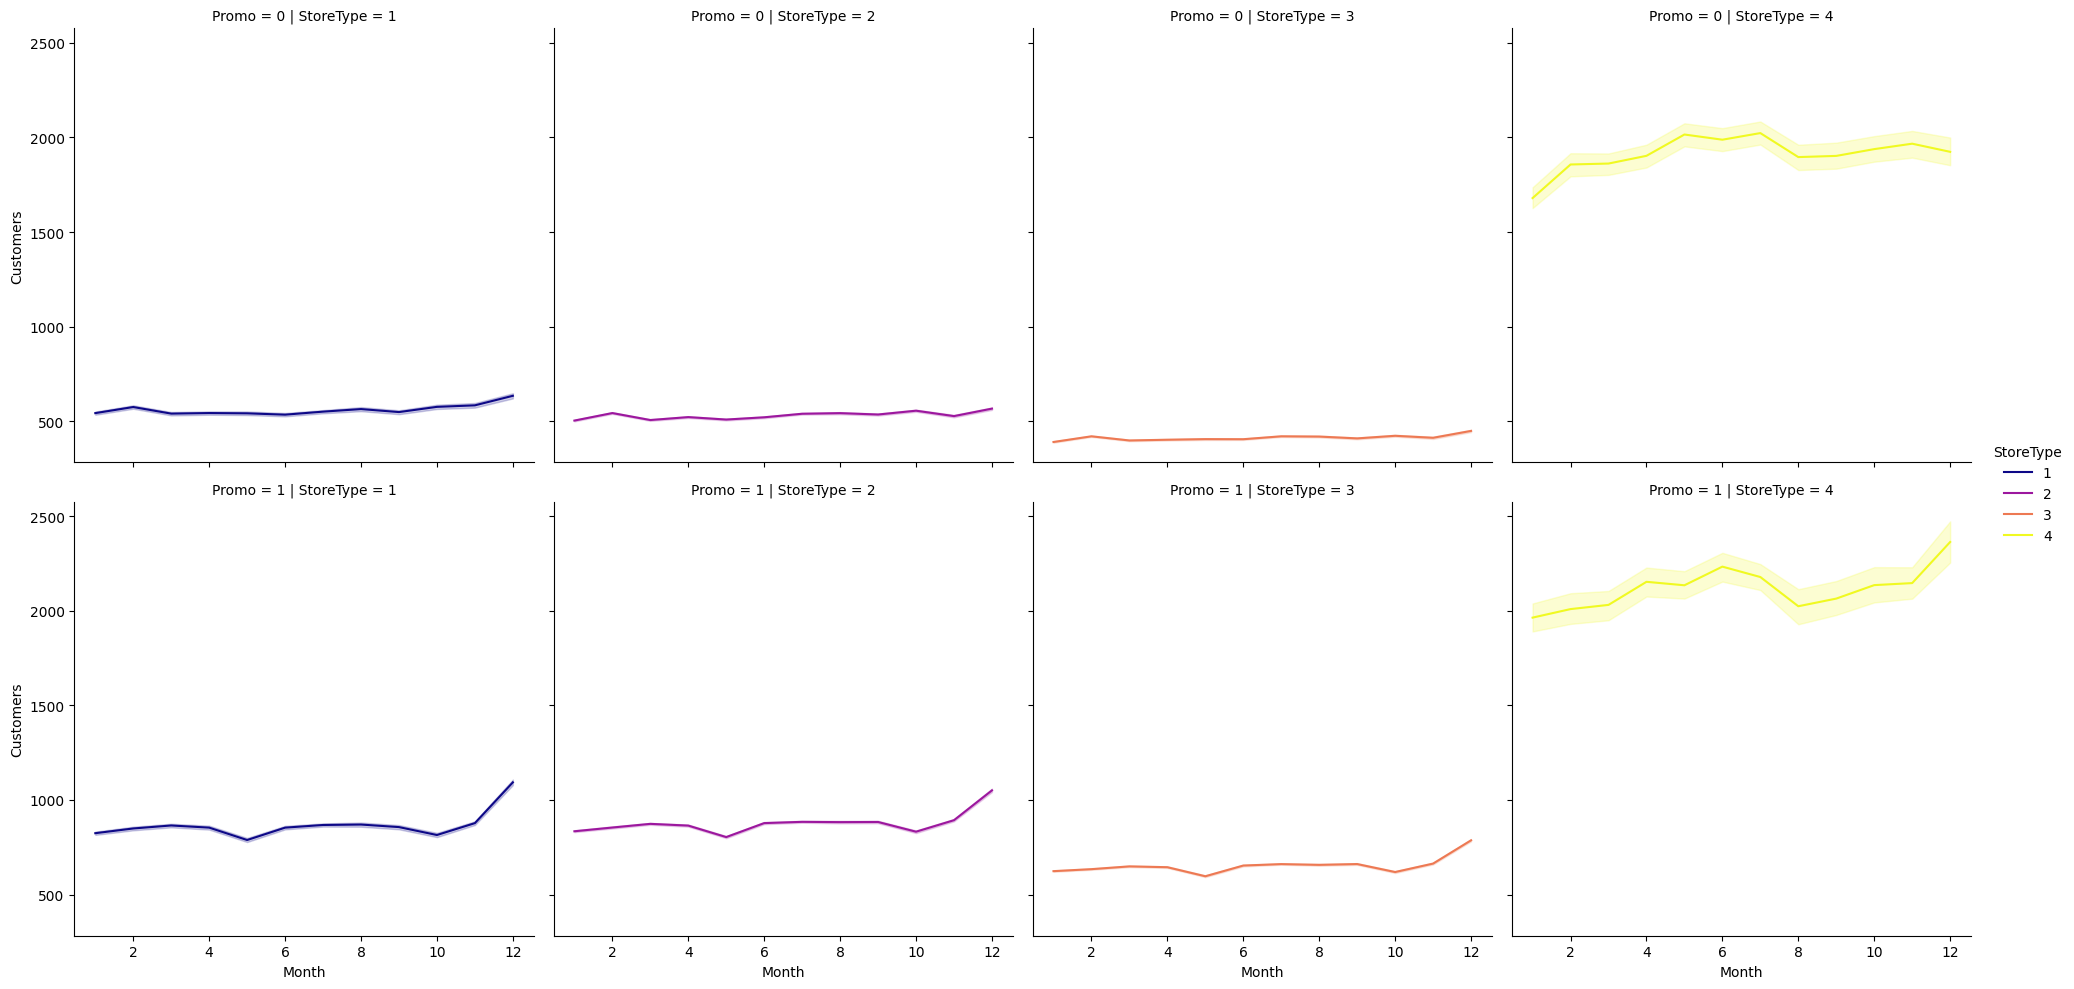

In [ ]:
# sales trends
sns.relplot(data = cleaned_dataset, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
            kind="line"
               )


All store types exhibit a similar trend, but the scale of this trend varies depending on the presence of the initial promotion (Promo) and the specific StoreType 2.

At this stage, it’s clear that sales increase significantly as the Christmas holiday approaches. A more detailed analysis of seasonality and trends will follow in the Time Series Analysis section.

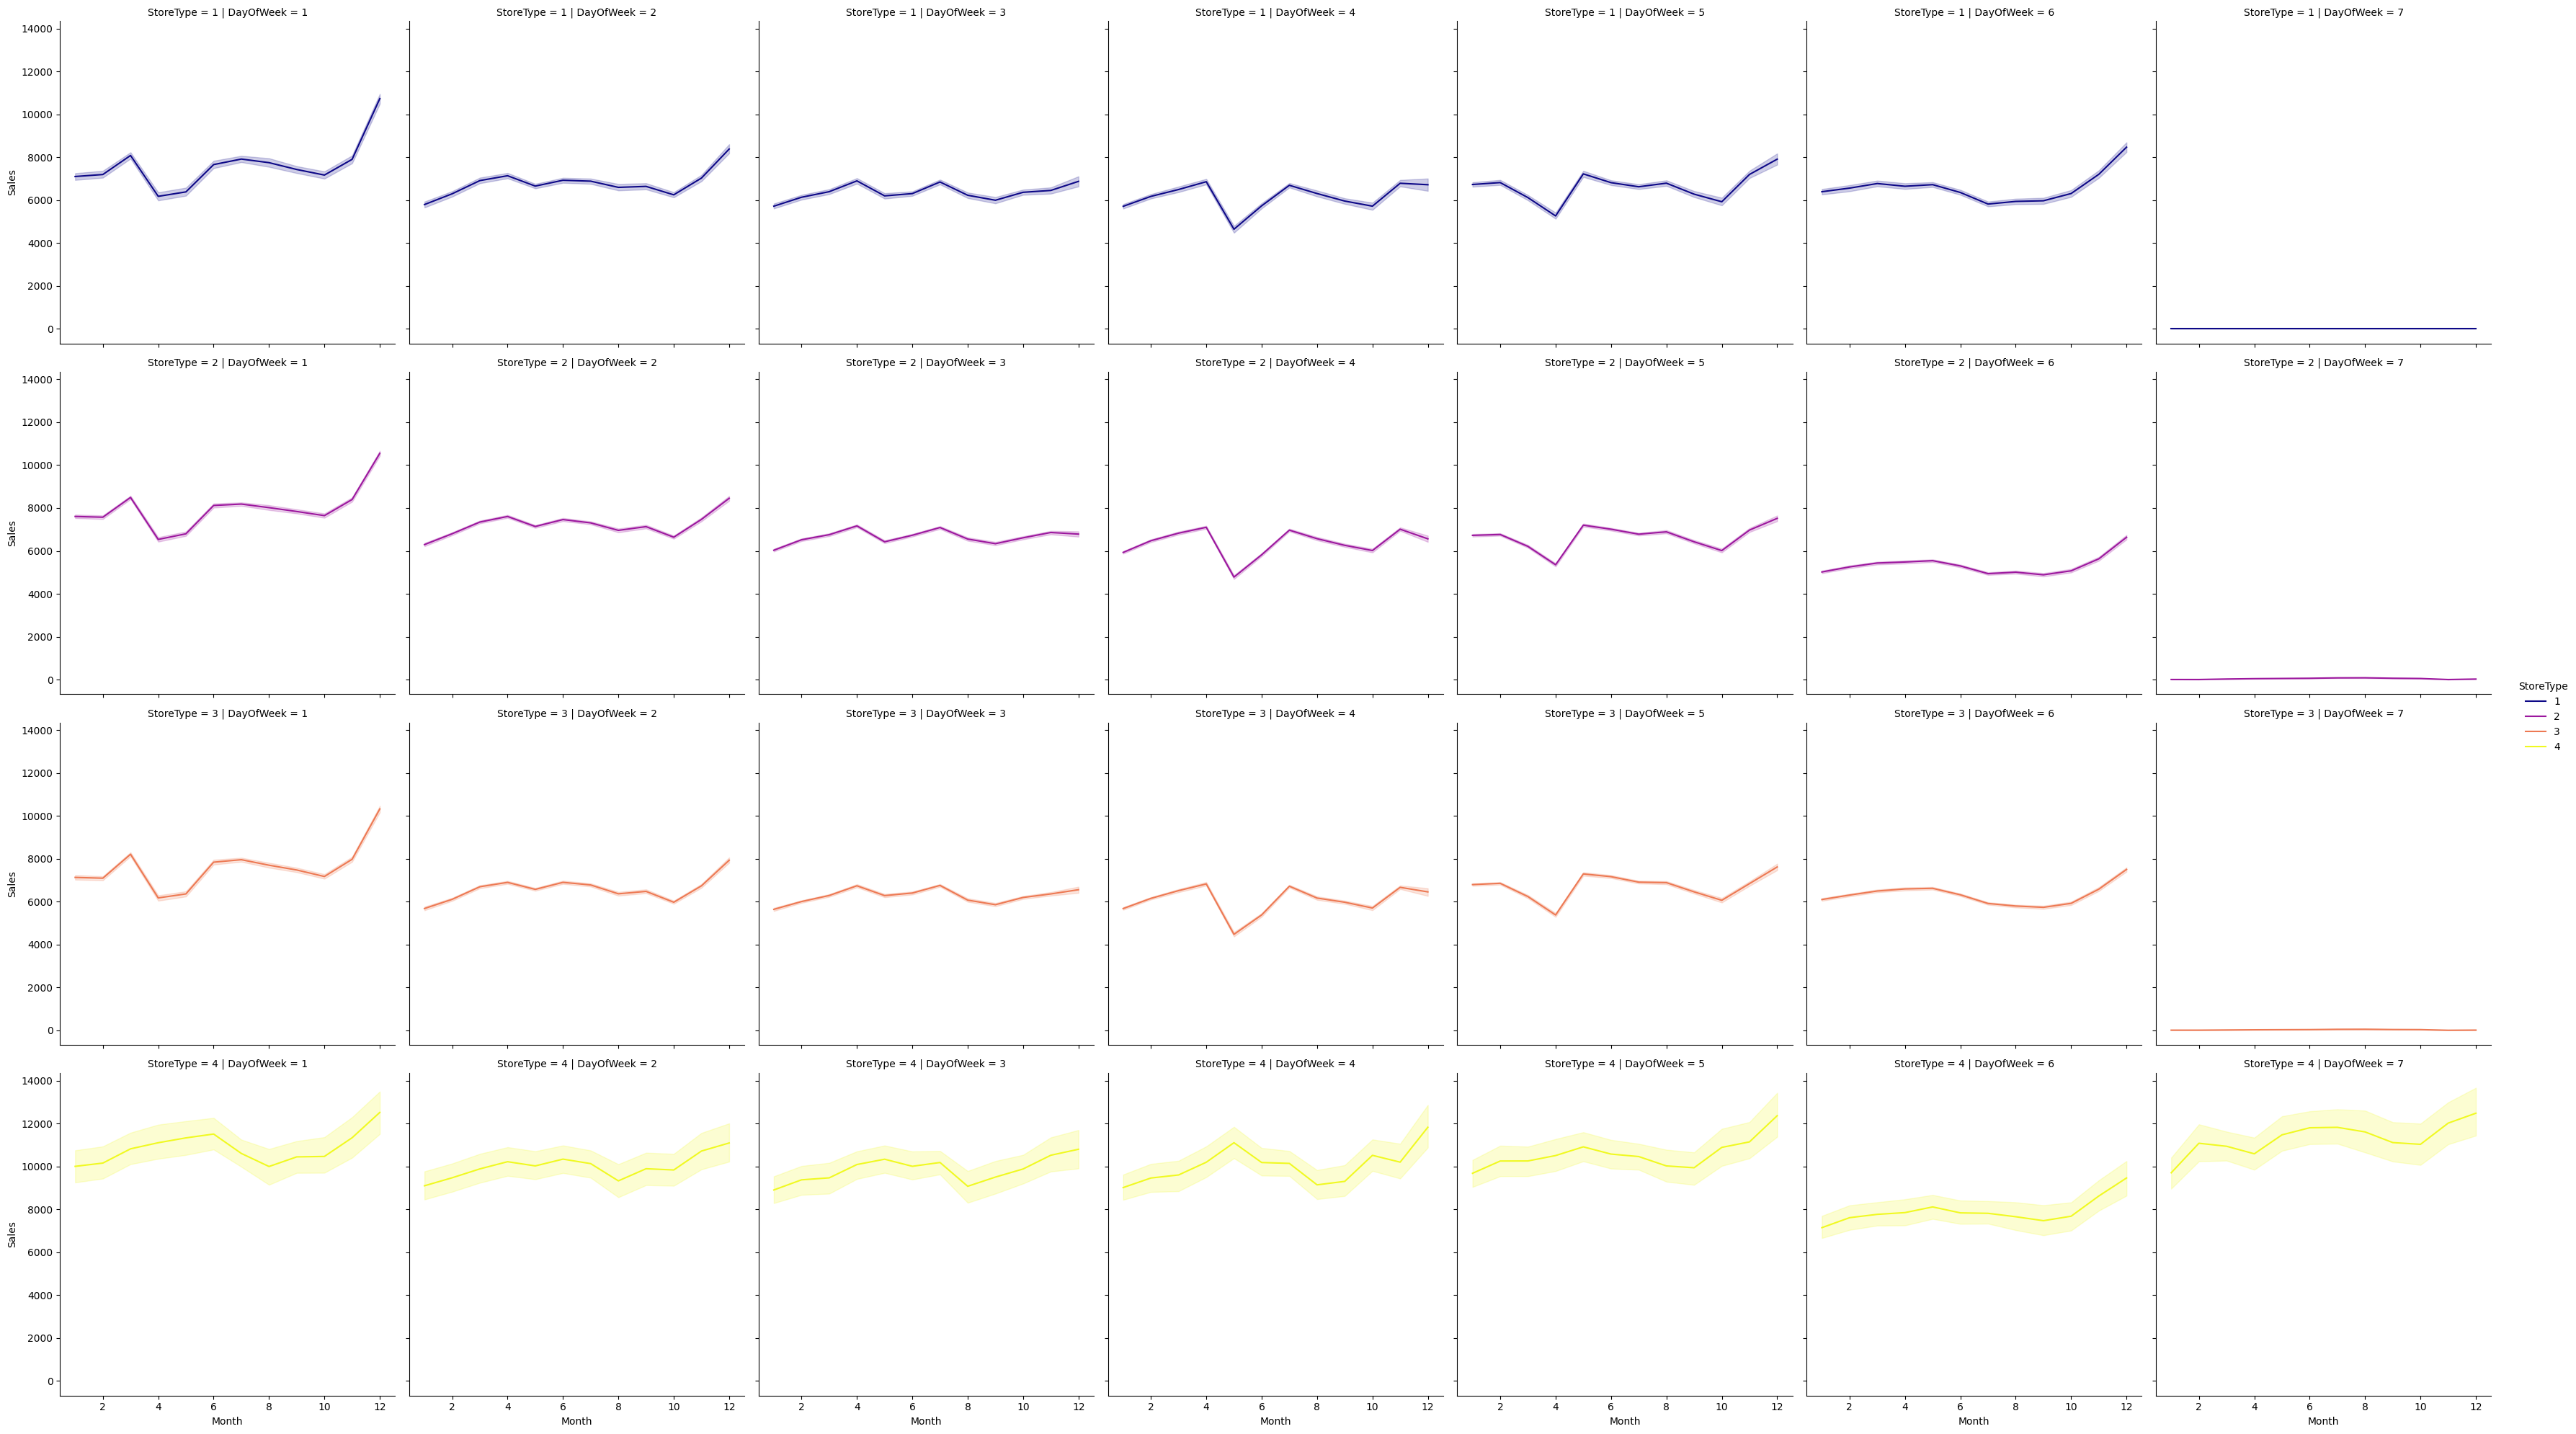

In [ ]:
# customers
sns.relplot(data = cleaned_dataset, x = 'Month', y = "Sales",
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               kind = 'line')

The stores that are open on Sundays are predominantly of StoreType 4, as shown in the data. While StoreTypes 1, 2, and 3 remain closed on Sundays throughout the year, StoreType 4 operates on Sundays.

In [ ]:
#cleaned_dataset.drop(['Date'],axis=1,inplace=True)

<Axes: >

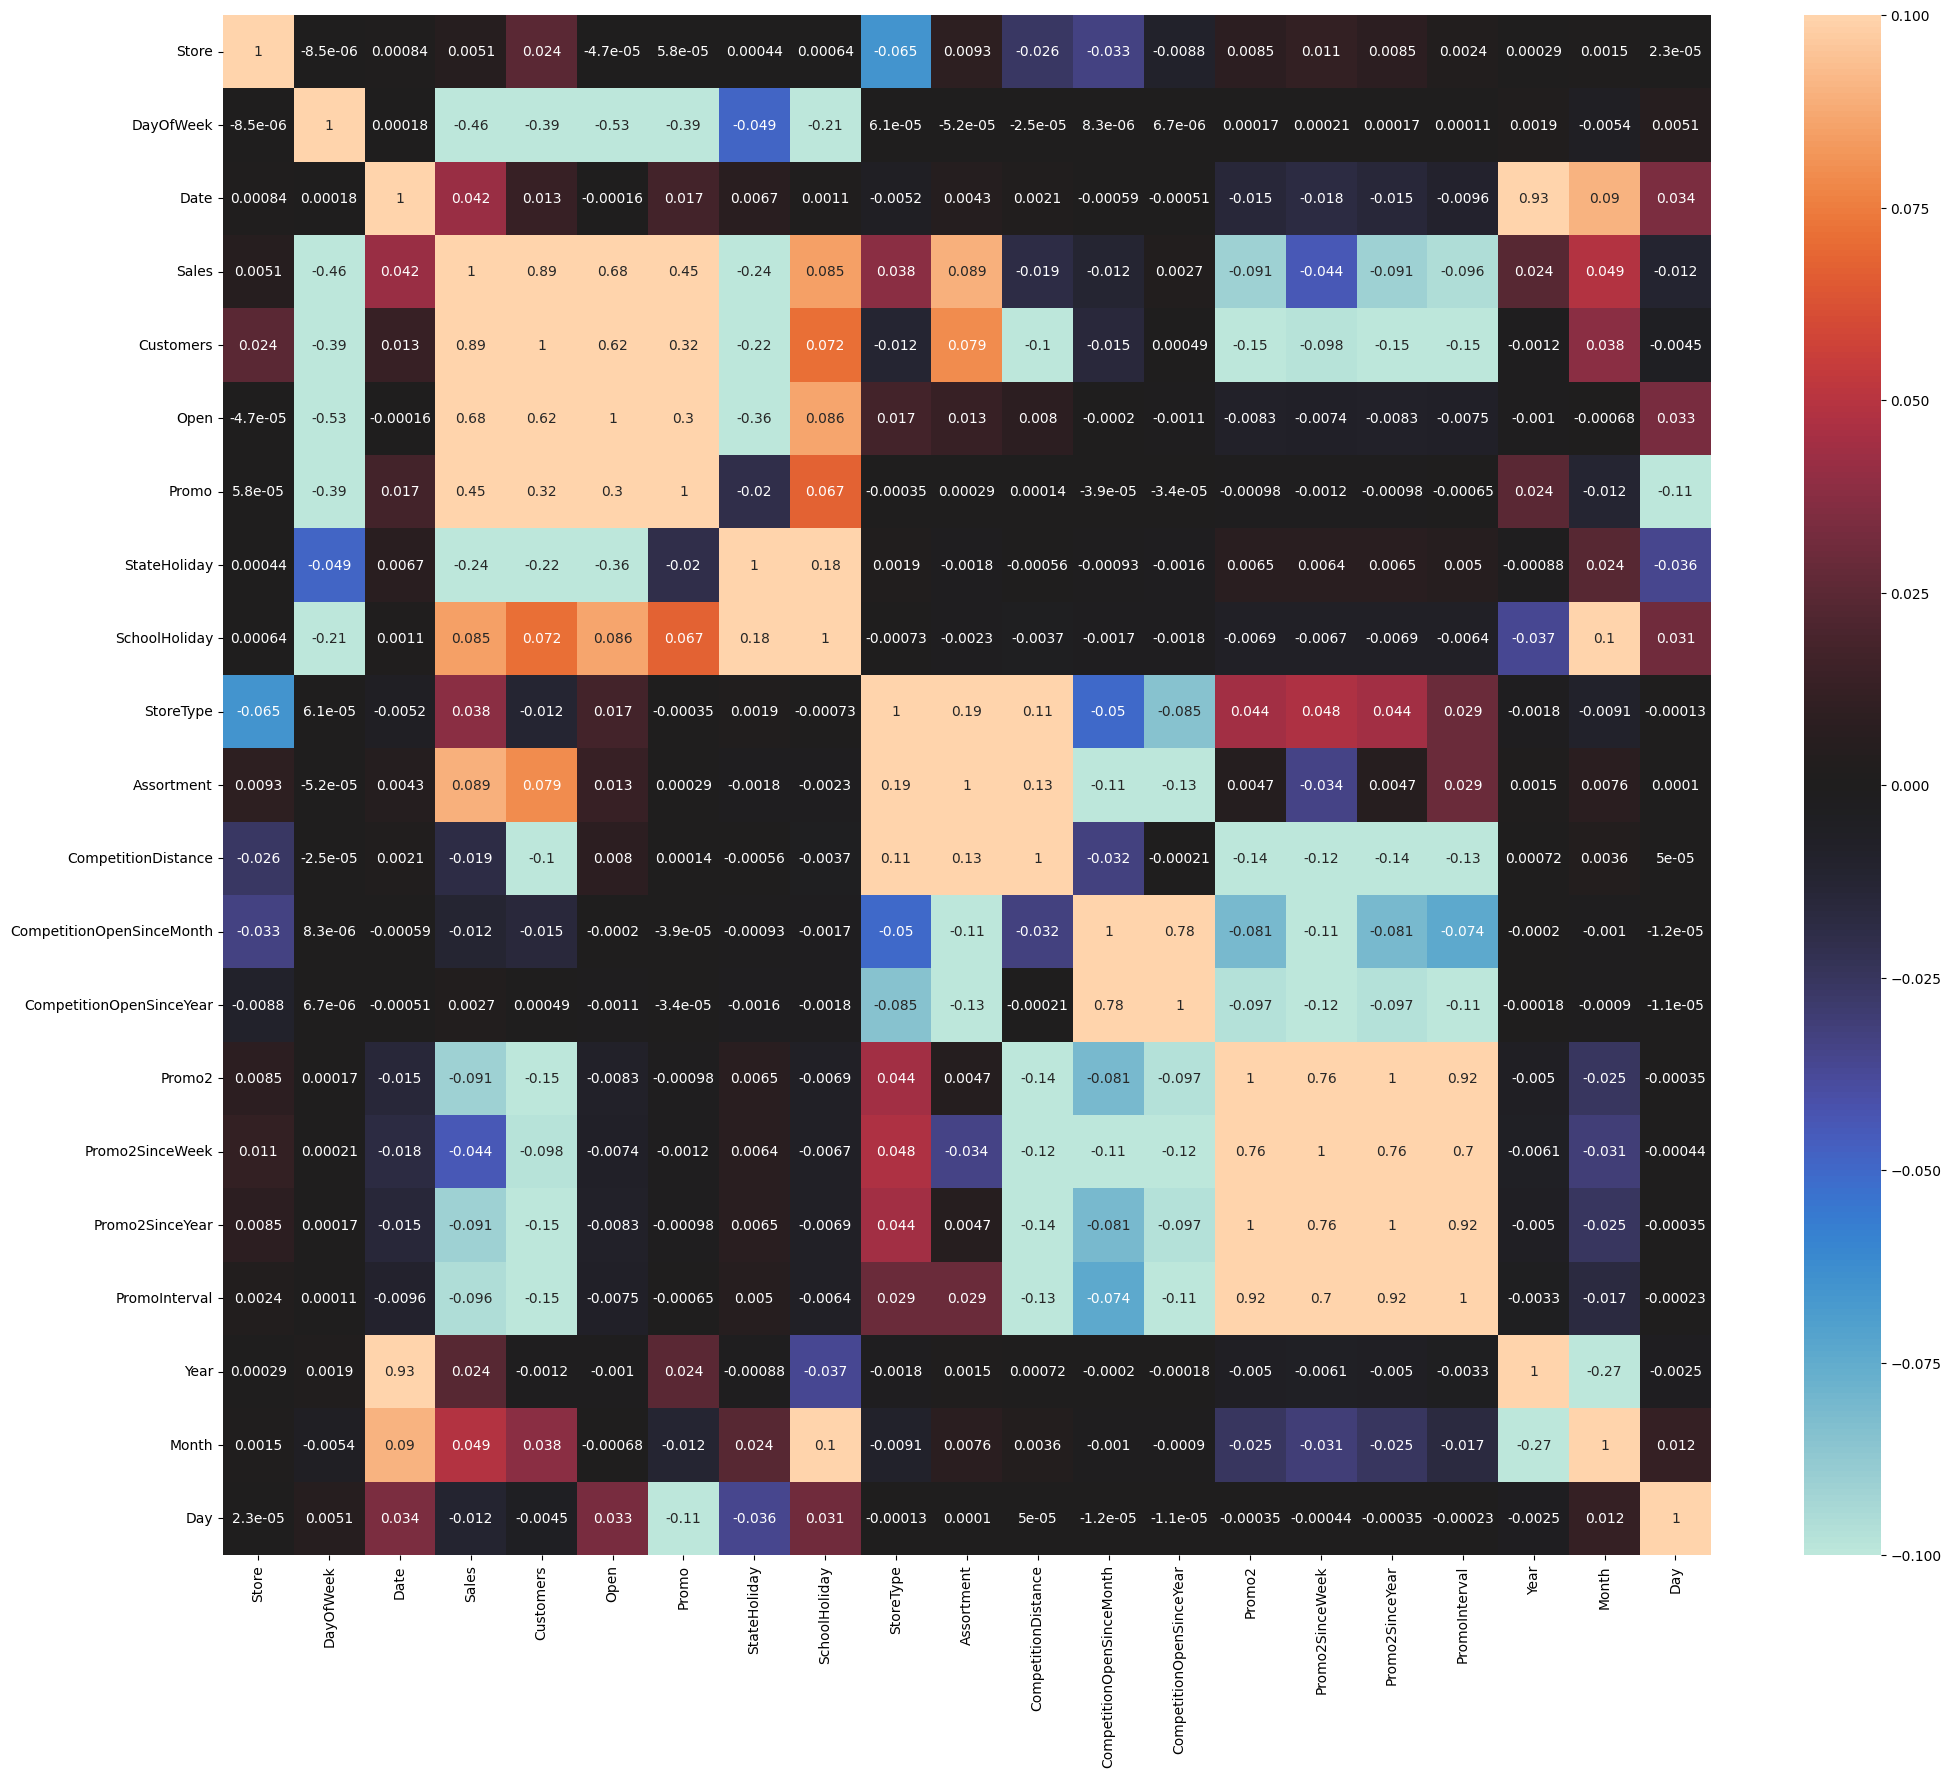

In [ ]:
# Set up the figure size for the heatmap to ensure it’s large and readable
plt.subplots(figsize=(24, 20))

# Generate a heatmap to visualize the correlation between features and the label
# 'annot=True' displays the correlation values on the heatmap
# 'vmin' and 'vmax' set the color scale limits to focus on correlations between -0.1 and 0.1
# 'center=0' centers the color map on 0 to differentiate positive and negative correlations
sns.heatmap(cleaned_dataset.corr(), annot=True, vmin=-0.1, vmax=0.1, center=0)


s previously observed, there is a strong positive correlation between the number of sales and the number of customers for a store. Additionally, we see a positive correlation between an active promotion (Promo = 1) and the number of customers.

However, when a store continues a consecutive promotion (Promo2 = 1), the number of customers and sales tends to either stabilize or decrease, as indicated by the slight negative correlation in the heatmap. A similar negative correlation is noticeable between the presence of a promotion and certain days of the week.

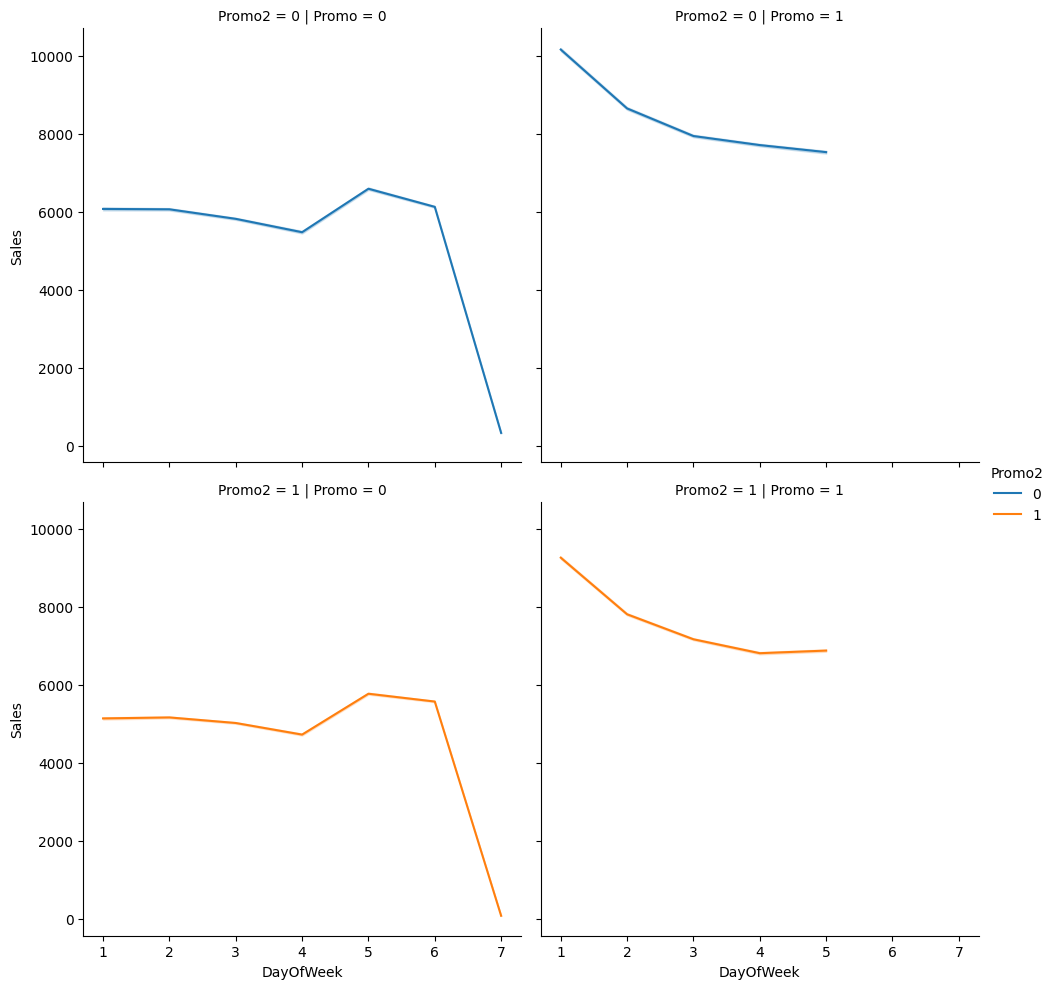

In [ ]:
# sale per customer trends
sns.relplot(data = cleaned_dataset, x = 'DayOfWeek', y = "Sales",
               col = 'Promo',
               row = 'Promo2',
               hue = 'Promo2',
               kind = 'line')

There are several insights to consider here:

1. When there is no promotion (both Promo and Promo2 are equal to 0), sales tend to peak on Sunday. However, since StoreType 2 is closed on Sundays, this peak primarily reflects data from StoreTypes 1, 2, and 3.

2. In contrast, stores running a promotion (Promo = 1) tend to achieve the highest sales on Monday. This trend could offer useful guidance for Rossmann's marketing campaigns.

3. Stores with both promotions active (Promo and Promo2 both equal to 1) also follow a similar pattern, with sales peaking on Monday.

4. Promo2 on its own does not appear to correlate with any significant change in sales, as indicated by the pale blue area on the heatmap shown earlier.

In [ ]:
cleaned_dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,1,...,1270,9,2008,0,0,0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2,...,570,11,2007,1,13,2010,2,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2,...,14130,12,2006,1,14,2011,2,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,1,...,620,9,2009,0,0,0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2,...,29910,4,2015,0,0,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,2,1,2,...,1900,6,2014,1,31,2013,2,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,2,1,1,...,1880,4,2006,0,0,0,0,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,2,1,2,...,9260,0,0,0,0,0,0,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,2,1,2,...,870,0,0,0,0,0,0,2013,1,1


In [ ]:
# Calculate the correlation of each feature with the target variable 'Sales'
# Sort the correlations in ascending order for easier analysis of which features are most and least correlated with 'Sales'
correlations = cleaned_dataset.corr()['Sales'].sort_values()
correlations


,Sales
DayOfWeek,-0.462125
StateHoliday,-0.244512
PromoInterval,-0.095965
Promo2SinceYear,-0.091056
Promo2,-0.091040
Promo2SinceWeek,-0.044143
CompetitionDistance,-0.018609
CompetitionOpenSinceMonth,-0.012431
Day,-0.011612
CompetitionOpenSinceYear,0.002749



### Feature Selection Based on Correlation with Sales

1. **Correlation Analysis**
   - To identify features most strongly associated with the target variable, `Sales`, a correlation analysis was conducted. Each feature's correlation with `Sales` was calculated, and the results were sorted in ascending order. This method helps reveal both positive and negative correlations, providing insight into which features may be the most predictive.

2. **Selecting Relevant Features**
   - Based on the correlation analysis, a subset of features was selected for further analysis and model training. The selected features include:
     - **Store**: Each store’s unique identifier, likely capturing differences in location, size, and customer base.
     - **Date**, **Month**, and **Day**: Temporal variables to help capture seasonality and daily trends in sales.
     - **StoreType**: Differentiates between store models, which may influence sales patterns.
     - **DayOfWeek**: Captures weekly patterns, as sales may vary by day of the week.
     - **StateHoliday** and **Promo**: Indicate whether state holidays or promotions occurred, which can significantly impact sales.
     - **Open**: Indicates whether the store was open on a given day, crucial for calculating sales on operational days only.
    
     - **Sales**: The target variable for prediction.

3. **Creating a New Dataset with Selected Features**
   - A new dataset was created containing only the selected features, simplifying the dataset and focusing on variables most correlated with `Sales`. This filtered dataset will serve as a foundation for training models that aim to predict future sales.

This approach reduces dimensionality and improves model interpretability by retaining only the features most relevant to the prediction task, potentially enhancing model performance.


# Feature Selection

In [ ]:
# Define a function to split our dataset into train/test splits using indices
def train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

In [ ]:
# Define the cross validation method
kfold = model_selection.ShuffleSplit(n_splits=10,random_state=42)
# Define empty dictionary for records
# k equal to number Features to Select
best_k = {
    'k':[],
    'f1_score':[],
    'recall_score':[],
    'precision_score':[]
}
# get random 30% of the dataset just for feature selactions
cleaned_dataset_random_sample = cleaned_dataset.sample(frac=0.05).copy()
y = cleaned_dataset_random_sample['Sales']
x = cleaned_dataset_random_sample.drop(['Sales'],axis=1)
x_norm = preprocessing.normalize(x)
y_norm = preprocessing.normalize(y.values.reshape(-1,1))
for k in tqdm(range(len(x.columns))):
    f1_score = []
    recall_score = []
    precision_score = []
    k +=1

    # Create the linear model
    lsvr = svm.SVR(kernel='linear',max_iter=-1)
    # Define the feature selection method
    feature_selector = feature_selection.RFE(lsvr,n_features_to_select=k)
    # fit the feature Selection method on the x_norm and y
    feature_selector.fit(x_norm,y)
    # get the new fetures
    new_x = feature_selector.transform(x_norm)

    # Evaluate svm on the features for defiant k values form 1 to 20
    for train_indexes,test_indexes in kfold.split(new_x,y):

        x_train,x_test,y_train,y_test = train_test_split(new_x,y,train_indexes,test_indexes,)

        model = svm.SVR()
        model.fit(x_train,y_train)
        pred = model.predict(x_test)


        f1_score.append(metrics.f1_score(y_test,pred))
        recall_score.append(metrics.recall_score(y_test,pred))
        precision_score.append( metrics.precision_score(y_test,pred))



    best_k['k'].append(k)
    best_k['f1_score'].append( np.mean(f1_score))
    best_k['recall_score'].append(np.mean( recall_score))
    best_k['precision_score'].append( np.mean(precision_score))

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(best_k)
scores_df


### Feature Selection Based on Correlation with Sales

1. **Correlation Analysis**
   - To identify features most strongly associated with the target variable, `Sales`, a correlation analysis was conducted. Each feature's correlation with `Sales` was calculated, and the results were sorted in ascending order. This method helps reveal both positive and negative correlations, providing insight into which features may be the most predictive.

2. **Selecting Relevant Features**
   - Based on the correlation analysis, a subset of features was selected for further analysis and model training. The selected features include:
     - **Store**: Each store’s unique identifier, likely capturing differences in location, size, and customer base.
     - **Date**, **Month**, and **Day**: Temporal variables to help capture seasonality and daily trends in sales.
     - **StoreType**: Differentiates between store models, which may influence sales patterns.
     - **DayOfWeek**: Captures weekly patterns, as sales may vary by day of the week.
     - **StateHoliday** and **Promo**: Indicate whether state holidays or promotions occurred, which can significantly impact sales.
     - **Open**: Indicates whether the store was open on a given day, crucial for calculating sales on operational days only.
    
     - **Sales**: The target variable for prediction.

3. **Creating a New Dataset with Selected Features**
   - A new dataset was created containing only the selected features, simplifying the dataset and focusing on variables most correlated with `Sales`. This filtered dataset will serve as a foundation for training models that aim to predict future sales.

This approach reduces dimensionality and improves model interpretability by retaining only the features most relevant to the prediction task, potentially enhancing model performance.


In [ ]:
# Define a list of selected feature names that are relevant for the analysis or model training
selected_features_names = ["Store", "Date", "Month", "Day", "StoreType", "DayOfWeek",
                           "StateHoliday", "Promo", "Open", "Sales"]

# Create a new dataset containing only the selected features from the cleaned dataset
new_dataset = cleaned_dataset[selected_features_names]

# Display the resulting dataset with the selected features
new_dataset


,Store,Date,Month,Day,StoreType,DayOfWeek,StateHoliday,Promo,Open,Sales
0,1,2015-07-31,7,31,1,5,0,1,1,5263
1,2,2015-07-31,7,31,2,5,0,1,1,6064
2,3,2015-07-31,7,31,2,5,0,1,1,8314
3,4,2015-07-31,7,31,1,5,0,1,1,13995
4,5,2015-07-31,7,31,2,5,0,1,1,4822
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2013-01-01,1,1,2,2,2,0,0,0
1017205,1112,2013-01-01,1,1,1,2,2,0,0,0
1017206,1113,2013-01-01,1,1,2,2,2,0,0,0
1017207,1114,2013-01-01,1,1,2,2,2,0,0,0


In [ ]:
# Sort the dataset by 'Store' and 'Date' columns
new_dataset.sort_values(by=['Store', 'Date'], inplace=True)

# Display the sorted dataset to verify the order
new_dataset


<ipython-input-20-8d5e4ea9fa51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset.sort_values(by=['Store', 'Date'], inplace=True)


,Store,Date,Month,Day,StoreType,DayOfWeek,StateHoliday,Promo,Open,Sales
1016095,1,2013-01-01,1,1,1,2,2,0,0,0
1014980,1,2013-01-02,1,2,1,3,0,0,1,5530
1013865,1,2013-01-03,1,3,1,4,0,0,1,4327
1012750,1,2013-01-04,1,4,1,5,0,0,1,4486
1011635,1,2013-01-05,1,5,1,6,0,0,1,4997
...,...,...,...,...,...,...,...,...,...,...
5574,1115,2015-07-27,7,27,3,1,0,1,1,10712
4459,1115,2015-07-28,7,28,3,2,0,1,1,8093
3344,1115,2015-07-29,7,29,3,3,0,1,1,7661
2229,1115,2015-07-30,7,30,3,4,0,1,1,8405


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Store         1017209 non-null  int64         
 1   Date          1017209 non-null  datetime64[ns]
 2   Month         1017209 non-null  int64         
 3   Day           1017209 non-null  int64         
 4   StoreType     1017209 non-null  int64         
 5   DayOfWeek     1017209 non-null  int64         
 6   StateHoliday  1017209 non-null  int64         
 7   Promo         1017209 non-null  int64         
 8   Open          1017209 non-null  int64         
 9   Sales         1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 85.4 MB


In [ ]:
x = new_dataset.drop(['Sales','Date'],axis=1).to_numpy()
y = new_dataset['Sales'].to_numpy()


In [ ]:
# Initialize a MinMaxScaler to scale the target values to a range between 0 and 1
y_normalizer = preprocessing.MinMaxScaler()

# Fit the scaler to the target values 'y' and transform them to normalize
# The reshape(-1, 1) is used to convert 'y' into a 2D array, as required by the scaler
y_norm = y_normalizer.fit_transform(y.reshape(-1, 1))


In [ ]:
# get the y_normalizer values
print(f"y_normalizer.data_min_: {y_normalizer.data_min_}")
print(f"y_normalizer.data_max_: {y_normalizer.data_max_}")


y_normalizer.data_min_: [0.]
y_normalizer.data_max_: [41551.]


In [ ]:
# save the normalizer
with open('y_normalizer.pkl', 'wb') as f:
    pickle.dump(y_normalizer, f)


In [ ]:
# Convert the feature sequences (x) to a 32-bit floating-point format
x = x.astype(np.float32)

# Convert the normalized target values (y_norm) to a 32-bit floating-point format
y_norm = y_norm.astype(np.float32)


In [ ]:
# Split the data into training and testing sets
# x_train and y_train contain 95% of the data for training, while x_test and y_test contain 5% for testing
# 'test_size=0.05' specifies that 5% of the data should be reserved for testing
# 'random_state=42' ensures that the split is reproducible with a fixed random seed
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y_norm, test_size=0.05, random_state=42)


In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (966348, 8)
x_test shape: (50861, 8)
y_train shape: (966348, 1)
y_test shape: (50861, 1)


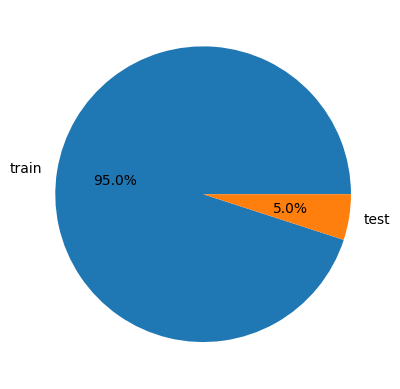

In [ ]:
# Plot the size for train and test in pie
plt.pie([x_train.shape[0],x_test.shape[0]],labels=['train','test'],autopct='%1.1f%%')
plt.show()

# Data Pipeline

In [ ]:
def data_pipeline(x, y):
    """
    Creates a TensorFlow data pipeline for efficient data loading, shuffling, batching, and prefetching.

    Parameters
    ----------
    x : np.array
        The feature data to be used in the pipeline.
    y : np.array
        The target data to be used in the pipeline.

    Returns
    -------
    tf.data.Dataset
        A TensorFlow dataset with shuffled, batched, and prefetched data.
    """

    # Create a dataset from feature and target arrays
    dataset = tf.data.Dataset.from_tensor_slices((x, y))

    # Shuffle the dataset with a buffer size of 1000, randomizing the data order
    dataset = dataset.shuffle(1000)

    # Batch the dataset with a batch size of 32, grouping samples for efficient model training
    dataset = dataset.batch(32)

    # Prefetch the dataset for improved performance, overlapping data preparation with model training
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset  # Return the processed dataset

# Create the training dataset pipeline with shuffling, batching, and prefetching
train_dataset = data_pipeline(x_train, y_train)

# Create the testing dataset pipeline without further shuffling (already shuffled in train_test_split)
test_dataset = data_pipeline(x_test, y_test)


In [ ]:
# Get first batch from the training pipeline
for x,y in train_dataset.take(1):
    print(f"x shape: {x.shape}")
    print(f"y shape: {y.shape}")

x shape: (32, 8)
y shape: (32, 1)


In [ ]:
x

<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[1.046e+03, 6.000e+00, 1.300e+01, 3.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
       [3.160e+02, 7.000e+00, 7.000e+00, 3.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [7.470e+02, 4.000e+00, 1.900e+01, 1.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [4.200e+02, 3.000e+00, 2.300e+01, 3.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.030e+02, 5.000e+00, 1.200e+01, 1.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [7.050e+02, 1.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
       [9.850e+02, 7.000e+00, 4.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00],
       [5.000e+02, 2.000e+00, 2.500e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
       [5.910e+02, 1.100e+01, 2.900e+01, 2.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
      

In [ ]:
y.dtype

tf.float32

# Modeling

## Model 01

In [2]:
# Define a custom deep neural network (DNN) model
class DNN(tf.keras.Model):
    def __init__(self):
        # Initialize the base model
        super(DNN, self).__init__()

        # Batch normalization layer to normalize inputs
        self.batch_norm = tf.keras.layers.BatchNormalization()

        # First dense layer (32 units) without bias, followed by layer normalization and dropout
        self.dense_1 = tf.keras.layers.Dense(32, use_bias=False)
        self.layer_norm_1 = tf.keras.layers.LayerNormalization()
        self.dropout_1 = tf.keras.layers.Dropout(0.2)  # Dropout with 20% rate

        # Second dense layer (64 units) without bias, followed by layer normalization and dropout
        self.dense_2 = tf.keras.layers.Dense(64, use_bias=False)
        self.layer_norm_2 = tf.keras.layers.LayerNormalization()
        self.dropout_2 = tf.keras.layers.Dropout(0.2)  # Dropout with 20% rate

        # Third dense layer (128 units) without bias, followed by layer normalization and dropout
        self.dense_3 = tf.keras.layers.Dense(128, use_bias=False)
        self.layer_norm_3 = tf.keras.layers.LayerNormalization()
        self.dropout_3 = tf.keras.layers.Dropout(0.2)  # Dropout with 20% rate

        # Output layer with 1 unit (for regression or binary classification tasks)
        self.out = tf.keras.layers.Dense(1)

    # Define the forward pass (call method)
    def call(self, inputs, training=False):
        # Apply batch normalization to the input
        x = self.batch_norm(inputs)

        # First layer block: dense layer, layer normalization, leaky ReLU activation, dropout
        x = self.dense_1(x)
        x = self.layer_norm_1(x)
        x = tf.nn.leaky_relu(x)
        x = self.dropout_1(x, training=training)

        # Second layer block: dense layer, layer normalization, leaky ReLU activation, dropout
        x = self.dense_2(x)
        x = self.layer_norm_2(x)
        x = tf.nn.leaky_relu(x)
        x = self.dropout_2(x, training=training)

        # Third layer block: dense layer, layer normalization, leaky ReLU activation, dropout
        x = self.dense_3(x)
        x = self.layer_norm_3(x)
        x = tf.nn.leaky_relu(x)
        x = self.dropout_3(x, training=training)

        # Output layer
        x = self.out(x)

        return x

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1],))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,

                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)



model_01 = DNN()
x = np.random.rand(32,8)
model_01(x)
model_01.summary()

Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  multiple                  32        
 Normalization)                                                  
                                                                 
 dense (Dense)               multiple                  256       
                                                                 
 layer_normalization (Layer  multiple                  64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  2048      
                                                                 
 layer_normalization_1 (Lay  multiple                  128     

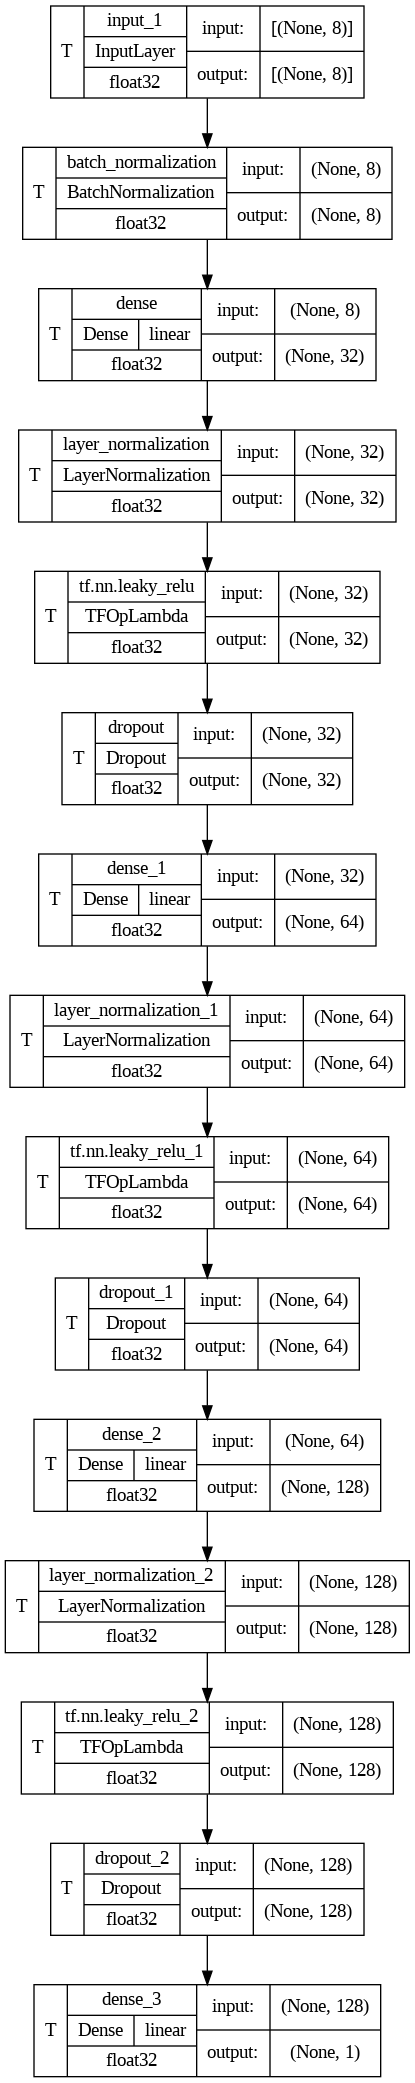

In [3]:
model_01.plot_model(x)

## Model 02

In [8]:
# This block implements a multi-path structure, where each path has a unique configuration of dense layers.
class IncpectionBlock(tf.keras.layers.Layer):

    def __init__(self, path_01_unites, path_02_unites, path_03_unites):
        """
        Initialize the IncpectionBlock with three separate paths.

        Parameters:
            path_01_unites (list of int): A list of units for the dense layers in Path 1.
            path_02_unites (list of int): A list of units for the dense layers in Path 2.
            path_03_unites (list of int): A list of units for the dense layers in Path 3.
        """

        # Initialize the base layer class
        super(IncpectionBlock, self).__init__()

        # Path 1: Three dense layers, each with layer normalization and dropout
        # Layer configuration specified by path_01_unites
        self.dense_1_1 = tf.keras.layers.Dense(path_01_unites[0], use_bias=False)
        self.layer_norm_1_1 = tf.keras.layers.LayerNormalization()
        self.dropout_1_1 = tf.keras.layers.Dropout(0.2)

        self.dense_1_2 = tf.keras.layers.Dense(path_01_unites[1], use_bias=False)
        self.layer_norm_1_2 = tf.keras.layers.LayerNormalization()
        self.dropout_1_2 = tf.keras.layers.Dropout(0.2)

        self.dense_1_3 = tf.keras.layers.Dense(path_01_unites[2], use_bias=False)
        self.layer_norm_1_3 = tf.keras.layers.LayerNormalization()
        self.dropout_1_3 = tf.keras.layers.Dropout(0.2)

        # Path 2: Two dense layers, each with layer normalization and dropout
        # Layer configuration specified by path_02_unites
        self.dense_2_1 = tf.keras.layers.Dense(path_02_unites[0], use_bias=False)
        self.layer_norm_2_1 = tf.keras.layers.LayerNormalization()
        self.dropout_2_1 = tf.keras.layers.Dropout(0.2)

        self.dense_2_2 = tf.keras.layers.Dense(path_02_unites[1], use_bias=False)
        self.layer_norm_2_2 = tf.keras.layers.LayerNormalization()
        self.dropout_2_2 = tf.keras.layers.Dropout(0.2)

        # Path 3: One dense layer with layer normalization and dropout
        # Layer configuration specified by path_03_unites
        self.dense_3_1 = tf.keras.layers.Dense(path_03_unites[0], use_bias=False)
        self.layer_norm_3_1 = tf.keras.layers.LayerNormalization()
        self.dropout_3_1 = tf.keras.layers.Dropout(0.2)

    # Define the forward pass of the layer
    def call(self, inputs, training=False):
        """
        Forward pass for the IncpectionBlock.

        Parameters:
            inputs (Tensor): Input tensor for the block.
            training (bool): Whether the model is in training mode (affects dropout).

        Returns:
            Tensor: Concatenated output from the three paths.
        """

        # Path 1: Process the inputs through three dense layers with normalization, activation, and dropout
        x1 = self.dense_1_1(inputs)
        x1 = self.layer_norm_1_1(x1)
        x1 = tf.nn.leaky_relu(x1)  # Activation function
        x1 = self.dropout_1_1(x1, training=training)

        x1 = self.dense_1_2(x1)
        x1 = self.layer_norm_1_2(x1)
        x1 = tf.nn.leaky_relu(x1)
        x1 = self.dropout_1_2(x1, training=training)

        x1 = self.dense_1_3(x1)
        x1 = self.layer_norm_1_3(x1)
        x1 = tf.nn.leaky_relu(x1)
        x1 = self.dropout_1_3(x1, training=training)

        # Path 2: Process the inputs through two dense layers with normalization, activation, and dropout
        x2 = self.dense_2_1(inputs)
        x2 = self.layer_norm_2_1(x2)
        x2 = tf.nn.leaky_relu(x2)  # Activation function
        x2 = self.dropout_2_1(x2, training=training)

        x2 = self.dense_2_2(x2)
        x2 = self.layer_norm_2_2(x2)
        x2 = tf.nn.leaky_relu(x2)
        x2 = self.dropout_2_2(x2, training=training)

        # Path 3: Process the inputs through one dense layer with normalization, activation, and dropout
        x3 = self.dense_3_1(inputs)
        x3 = self.layer_norm_3_1(x3)
        x3 = tf.nn.leaky_relu(x3)  # Activation function
        x3 = self.dropout_3_1(x3, training=training)

        # Concatenate the outputs from all three paths along the last axis
        x = tf.concat([x1, x2, x3], axis=-1)

        return x

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1],))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,

                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)









# block test
block = IncpectionBlock(path_01_unites=[16,32,64],
                        path_02_unites=[16,32],
                        path_03_unites=[16])

block(x)



<tf.Tensor: shape=(32, 112), dtype=float32, numpy=
array([[-0.13481812,  1.292661  , -0.35894164, ..., -0.08644632,
        -0.16747071, -0.0564041 ],
       [ 0.01086402,  1.7773608 , -0.19905296, ..., -0.19485109,
        -0.03893079, -0.03540214],
       [-0.0878063 ,  1.554014  , -0.2853416 , ..., -0.02546299,
        -0.1116926 , -0.07539633],
       ...,
       [ 0.13645925,  1.0692717 , -0.29671922, ..., -0.11605871,
        -0.39283606,  0.49031904],
       [-0.19261603,  1.5860465 , -0.08230709, ..., -0.2395941 ,
        -0.12173655,  0.55493534],
       [-0.04209318,  1.0262021 , -0.26872084, ..., -0.27139133,
        -0.35735187,  0.04152845]], dtype=float32)>

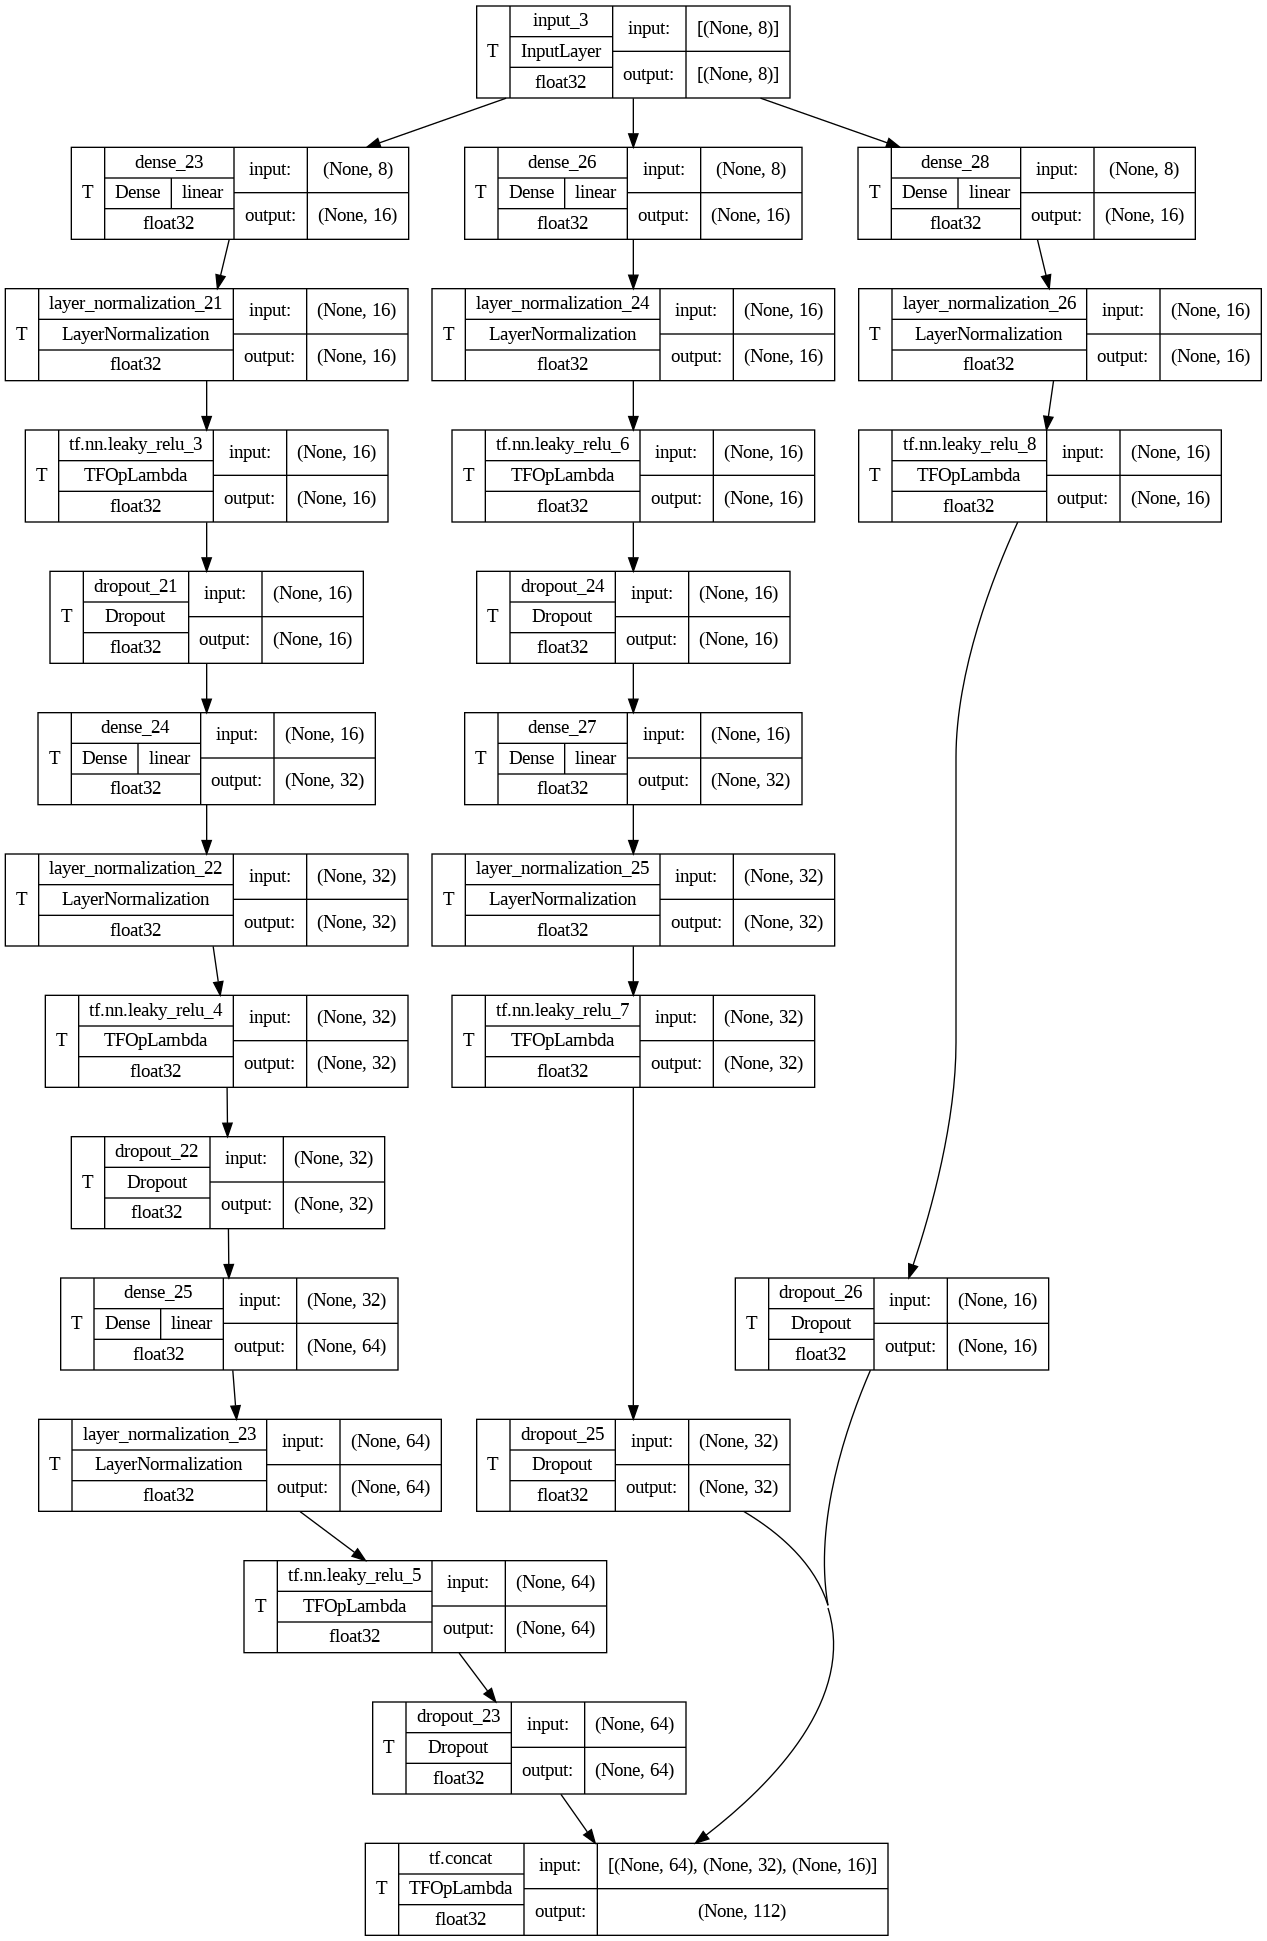

In [9]:
block.plot_model(x)

In [6]:

# Define the main inspection model that uses multiple IncpectionBlock layers
class Incpection(tf.keras.Model):
    def __init__(self):
        # Initialize the base model
        super(Incpection, self).__init__()

        # Initial batch normalization layer to normalize input features
        self.batch_norm = tf.keras.layers.BatchNormalization()

        # First IncpectionBlock with specified units for each path
        self.block_01 = IncpectionBlock(
            path_01_unites=[16, 32, 64],
            path_02_unites=[16, 32],
            path_03_unites=[16]
        )

        # Second IncpectionBlock with increased units for each path
        self.block_02 = IncpectionBlock(
            path_01_unites=[32, 64, 128],
            path_02_unites=[32, 64],
            path_03_unites=[32]
        )

        # Output layer with 1 unit (for regression or binary classification tasks)
        self.out = tf.keras.layers.Dense(1)

    # Define the forward pass (call method)
    def call(self, inputs, training=False):
        # Apply batch normalization to the input
        x = self.batch_norm(inputs)

        # Pass the input through the first inspection block
        x = self.block_01(x, training=training)

        # Pass the output of the first block through the second inspection block
        x = self.block_02(x, training=training)

        # Pass the output of the second block to the final output layer
        x = self.out(x)

        return x

    def plot_model(self,x):
        """
        Plot the model architecture.
        """
        input_layer = tf.keras.layers.Input(shape=(x.shape[1],))
        output_layer = self.call(input_layer)
        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

        return tf.keras.utils.plot_model(model, show_shapes=True,
                                          show_dtype=True,
                                         show_layer_names=True,

                                         rankdir='TB', expand_nested=True,
                                         dpi=96, layer_range=None, show_layer_activations=True,
                                         show_trainable=True)




model_02 = Incpection()
x = np.random.rand(32,8)
model_02(x)
model_02.summary()


Model: "incpection_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  multiple                  32        
 chNormalization)                                                
                                                                 
 incpection_block_1 (Incpec  multiple                  3808      
 tionBlock)                                                      
                                                                 
 incpection_block_2 (Incpec  multiple                  23744     
 tionBlock)                                                      
                                                                 
 dense_22 (Dense)            multiple                  225       
                                                                 
Total params: 27809 (108.63 KB)
Trainable params: 27793 (108.57 KB)
Non-trainable params: 16 (64.00 Byte)
______________

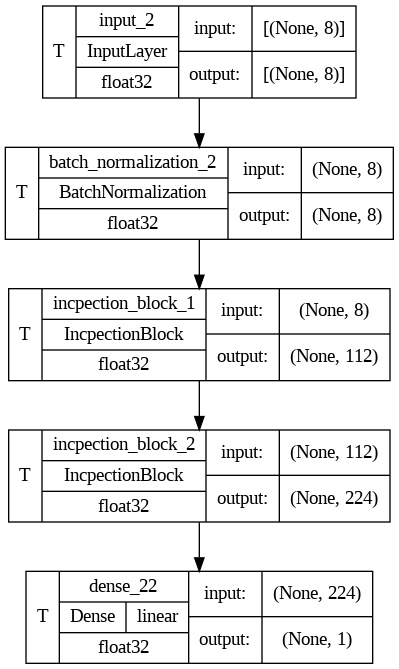

In [7]:
model_02.plot_model(x)

In [ ]:

def RMSPE(y_true, y_pred):
    """
    Calculates the Root Mean Square Percentage Error (RMSPE) between true and predicted values.
    RMSPE is a common metric for regression tasks where relative error (in percentage terms) is more meaningful.

    Parameters
    ----------
    y_true : Tensor
        The ground truth values.

    y_pred : Tensor
        The predicted values by the model.

    Returns
    -------
    Tensor
        The calculated RMSPE, representing the average percentage error in prediction.
    """

    # Ensure y_true does not contain zeros to avoid division by zero
    nonzero_mask = tf.not_equal(y_true, 0)
    y_true_safe = tf.where(nonzero_mask, y_true, tf.ones_like(y_true))

    # Calculate percentage errors only on non-zero elements
    percentage_errors = tf.where(
        nonzero_mask,
        (y_true - y_pred) / y_true_safe,
        tf.zeros_like(y_true)
    )

    # Calculate the Root Mean Square Percentage Error
    rmspe = tf.sqrt(tf.reduce_mean(tf.square(percentage_errors)))

    return rmspe  # Return the RMSPE value


# Training

In [ ]:

class Trainer:
    """
    A custom Trainer class for training and evaluating TensorFlow models with features like:
    - Automatic gradient computation and application
    - RMSPE and R2Score metrics tracking
    - Saving the best model based on validation performance

    Parameters
    ----------
    model : tf.keras.Model
        The model to be trained and evaluated.

    optimizer : tf.keras.optimizers.Optimizer
        The optimizer to use for updating model weights.

    loss_fn : tf.keras.losses.Loss
        The loss function used to compute the training loss.

    save_path : str
        The path to save the best-performing model.

    Attributes
    ----------
    train_loss, test_loss : tf.metrics.Mean
        Track the average loss over training and testing datasets.

    train_r2, test_r2 : tf.metrics.R2Score
        Track the R-squared metric for training and testing.

    train_rmsp, test_rmsp : tf.metrics.Mean
        Track the Root Mean Square Percentage Error (RMSPE) for training and testing.
    """

    def __init__(self, model, optimizer, loss_fn, save_path):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
        self.path_to_save_best_model = save_path

        # Metrics for tracking losses and performance on train/test sets
        self.train_loss = tf.metrics.Mean(name='train_loss')
        self.test_loss = tf.metrics.Mean(name='test_loss')
        self.train_r2 = tf.metrics.R2Score(name='train_r2')
        self.test_r2 = tf.metrics.R2Score(name='test_r2')
        self.train_rmsp = tf.metrics.Mean(name='train_rmsp')
        self.test_rmsp = tf.metrics.Mean(name='test_rmsp')

    @tf.function
    def train_step(self, x, y):
        """
        Performs a single training step, including forward pass, loss computation,
        and gradient application.

        Parameters
        ----------
        x : Tensor
            Training data.

        y : Tensor
            Ground truth labels for training data.
        """
        with tf.GradientTape() as tape:
            predictions = self.model(x,training=True)
            loss = self.loss_fn(y, predictions)

        # Calculate and apply gradients
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))

        # Calculate RMSPE and update metrics
        rmspe = RMSPE(y, predictions)
        self.train_loss(loss)
        self.train_rmsp(rmspe)
        self.train_r2.update_state(y, predictions)

    @tf.function
    def test_step(self, x, y):
        """
        Performs a single evaluation step on the testing set.

        Parameters
        ----------
        x : Tensor
            Testing data.

        y : Tensor
            Ground truth labels for testing data.
        """
        predictions = self.model(x,training=False)
        loss = self.loss_fn(y, predictions)
        rmspe = RMSPE(y, predictions)

        # Update metrics for testing set
        self.test_loss(loss)
        self.test_rmsp(rmspe)
        self.test_r2.update_state(y, predictions)

    def fit(self, epochs, train_dataset, test_dataset):
        """
        Trains the model over a specified number of epochs, evaluates on the test set,
        and saves the best-performing model based on test loss.

        Parameters
        ----------
        epochs : int
            Number of epochs to train the model.

        train_dataset : tf.data.Dataset
            The dataset used for training.

        test_dataset : tf.data.Dataset
            The dataset used for testing.
        """
        old_loss = float('inf')  # Track the lowest test loss

        # Model training report
        print(f"Model name: {self.model.name}")
        print(f"Optimizer: {self.optimizer.__class__.__name__}")
        print(f"Loss function: {self.loss_fn.__class__.__name__}")
        print(f"Epochs: {epochs}")
        print(f"Train dataset size: {len(train_dataset)}")
        print(f"Test dataset size: {len(test_dataset)}")
        print(f"Model Summary: {self.model.summary()}")

        for epoch in range(epochs):
            # Reset metrics at the beginning of each epoch
            self.train_loss.reset_state()
            self.test_loss.reset_state()
            self.train_r2.reset_state()
            self.test_r2.reset_state()
            self.train_rmsp.reset_state()
            self.test_rmsp.reset_state()

            # Training step with progress bar
            progress_bar = tqdm(train_dataset, desc=f'Training epoch {epoch + 1}')
            for x, y in progress_bar:
                self.train_step(x, y)
                progress_bar.set_description(f"Training epoch {epoch + 1}, Train loss: {self.train_loss.result():.4f}")

            # Testing step with progress bar
            progress_bar = tqdm(test_dataset, desc=f'Testing epoch {epoch + 1}')
            for x, y in progress_bar:
                self.test_step(x, y)
                progress_bar.set_description(f"Testing epoch {epoch + 1}, Test loss: {self.test_loss.result():.4f}")

            # Epoch report
            print(f"Epoch: {epoch + 1}/{epochs}")
            print(f"Train loss: {self.train_loss.result()}")
            print(f"Train R2: {self.train_r2.result()}")
            print(f"Test loss: {self.test_loss.result()}")
            print(f"Test R2: {self.test_r2.result()}")
            print(f"Train RMSPE: {self.train_rmsp.result()}")
            print(f"Test RMSPE: {self.test_rmsp.result()}")
            print("#" * 50)

            # Save the best model if test loss improves and test loss < train loss (to avoid overfitting)
            if old_loss > self.test_loss.result() and self.test_loss.result() < self.train_loss.result():
                old_loss = self.test_loss.result()
                path_save_best_model = f"{self.path_to_save_best_model}/{self.model.name}"

                tf.saved_model.save(self.model, path_save_best_model)
                print(f"Model saved at {path_save_best_model} with test loss {self.test_loss.result()}")
                print("#" * 50)


## Model 01 Training

In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_01,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: dnn
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  multiple                  32        
 Normalization)                                                  
                                                                 
 dense (Dense)               multiple                  256       
                                                                 
 layer_normalization (Layer  multiple                  64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  2048      
                

Testing epoch 1, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:20<00:00, 77.68it/s]


Epoch: 1/5
Train loss: 0.002967905020341277
Train R2: 0.2950129508972168
Test loss: 0.0018451267387717962
Test R2: 0.5671569108963013
Train RMSPE: 0.4830673336982727
Test RMSPE: 0.4154624938964844
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/dnn with test loss 0.0018451267387717962
##################################################


Testing epoch 2, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:12<00:00, 132.41it/s]


Epoch: 2/5
Train loss: 0.0019081596983596683
Train R2: 0.5556435585021973
Test loss: 0.0018223441438749433
Test R2: 0.5725967884063721
Train RMSPE: 0.4435092806816101
Test RMSPE: 0.4379326105117798
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/dnn with test loss 0.0018223441438749433
##################################################


Testing epoch 3, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 3/5
Train loss: 0.0018939872970804572
Train R2: 0.558908224105835
Test loss: 0.0018282446544617414
Test R2: 0.571081280708313
Train RMSPE: 0.44207730889320374
Test RMSPE: 0.40773388743400574
##################################################


Testing epoch 4, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:11<00:00, 138.22it/s]


Epoch: 4/5
Train loss: 0.0018871994689106941
Train R2: 0.5605095624923706
Test loss: 0.0018139962339773774
Test R2: 0.5744032263755798
Train RMSPE: 0.44138574600219727
Test RMSPE: 0.4215864837169647
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/dnn with test loss 0.0018139962339773774
##################################################


Testing epoch 5, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:15<00:00, 105.56it/s]


Epoch: 5/5
Train loss: 0.0018845313461497426
Train R2: 0.5611264109611511
Test loss: 0.001822083373554051
Test R2: 0.5727738738059998
Train RMSPE: 0.4412813186645508
Test RMSPE: 0.44721508026123047
##################################################


In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001
# Adam is an adaptive optimizer that adjusts the learning rate based on estimates of lower-order moments
# It is well-suited for large datasets and models with sparse gradients, commonly used.
optimizer = tf.optimizers.Adam(learning_rate=0.001)

# Define the Huber loss as the loss function for the model
# Huber loss is a combination of Mean Squared Error (MSE) and Mean Absolute Error (MAE)
# It is quadratic for small errors, acting like MSE, and linear for large errors, similar to MAE
# This makes it less sensitive to outliers and more robust for regression tasks with potential noise
loss_fn = tf.losses.Huber()

save_path ="/content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models"
trainer = Trainer(model_02,optimizer,loss_fn,save_path)
trainer.fit(5,train_dataset,test_dataset)

Model name: incpection
Optimizer: Adam
Loss function: Huber
Epochs: 5
Train dataset size: 30199
Test dataset size: 1590
Model: "incpection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  multiple                  32        
 chNormalization)                                                
                                                                 
 incpection_block_1 (Incpec  multiple                  3808      
 tionBlock)                                                      
                                                                 
 incpection_block_2 (Incpec  multiple                  23744     
 tionBlock)                                                      
                                                                 
 dense_22 (Dense)            multiple                  225       
                                                                 
To

Testing epoch 1, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:19<00:00, 83.16it/s] 


Epoch: 1/5
Train loss: 0.0027222384233027697
Train R2: 0.3610192537307739
Test loss: 0.0018280067015439272
Test R2: 0.5711913108825684
Train RMSPE: 0.4777601957321167
Test RMSPE: 0.42358189821243286
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/incpection with test loss 0.0018280067015439272
##################################################


Testing epoch 2, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:20<00:00, 77.68it/s] 


Epoch: 2/5
Train loss: 0.0018937825225293636
Train R2: 0.5589616894721985
Test loss: 0.001791631686501205
Test R2: 0.5797185897827148
Train RMSPE: 0.4438802897930145
Test RMSPE: 0.42720532417297363
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/incpection with test loss 0.001791631686501205
##################################################


Testing epoch 3, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:14<00:00, 112.19it/s]


Epoch: 3/5
Train loss: 0.0018759487429633737
Train R2: 0.5631177425384521
Test loss: 0.0017837951891124249
Test R2: 0.581575870513916
Train RMSPE: 0.4409080147743225
Test RMSPE: 0.43492934107780457
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/incpection with test loss 0.0017837951891124249
##################################################


Testing epoch 4, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s] 


Epoch: 4/5
Train loss: 0.001866164500825107
Train R2: 0.5654083490371704
Test loss: 0.0017940921243280172
Test R2: 0.579318106174469
Train RMSPE: 0.43899673223495483
Test RMSPE: 0.39548012614250183
##################################################


Testing epoch 5, Test loss: 0.0018: 100%|██████████| 1590/1590 [00:20<00:00, 77.69it/s]


Epoch: 5/5
Train loss: 0.0018615128938108683
Train R2: 0.5664860010147095
Test loss: 0.0017817297484725714
Test R2: 0.5820866227149963
Train RMSPE: 0.437496542930603
Test RMSPE: 0.4445604681968689
##################################################
Model saved at /content/drive/MyDrive/Essex University/CE889-7-AU  Neural Networks and Deep Learning (Autumn term)/Assignment/Task 02/Models/incpection with test loss 0.0017817297484725714
##################################################
